In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
import cv2
from glob import glob
from tqdm import tqdm
from PIL import Image
from fastprogress import progress_bar
from matplotlib import pyplot as plt
from torch import nn
from torch import Tensor
import torch.nn.functional as F
from torch import optim
import torchvision.models as models
import torch
from torch.autograd import Function
from itertools import repeat
import numpy as np

from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [56]:
from utils import get_config, show_batch
from dataset import FoodDataset
from models import Unet
from losses import FocalLoss

In [15]:
config = get_config('./configs/local.yaml')
df_anno = torch.load(config['DATA']['ANNO'])

In [16]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = {"image": transforms.Compose([
    transforms.Resize((int(config.DATA.IMG_SIZE),int(config.DATA.IMG_SIZE))),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)]),
             "mask": transforms.Compose([
    transforms.Resize((int(config.DATA.IMG_SIZE),int(config.DATA.IMG_SIZE)))])}

In [17]:
train_ds = FoodDataset(config = config, df = df_anno[df_anno['is_valid']==False], transform = transform)
valid_ds = FoodDataset(config = config, df = df_anno[df_anno['is_valid']==True],  transform = transform)

In [18]:
train_dl = DataLoader(train_ds, config.DATA.BATCH_SIZE, config.DATA.NUM_WORKERS)
valid_dl = DataLoader(valid_ds, config.DATA.BATCH_SIZE, config.DATA.NUM_WORKERS)

In [21]:
for img, mask in train_dl:
    break

In [20]:
model = Unet()

In [23]:
outputs = model(img)

In [52]:
loss_fc = FocalLoss(gamma=1, reduction = 'mean')

In [55]:
loss_fc(outputs, mask)

tensor(0., grad_fn=<MeanBackward0>)

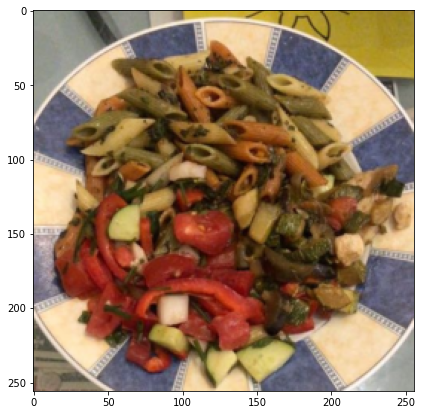

In [57]:
show_batch(img[0])

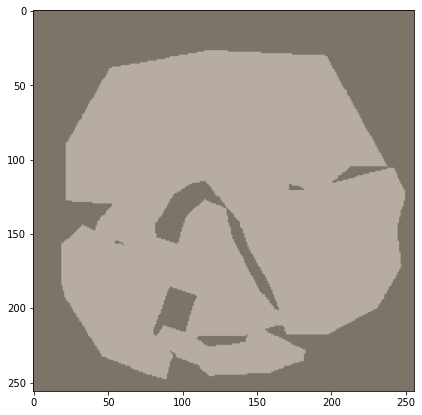

In [58]:
show_batch(mask[0])